모델의 학습이 어떻게 이루어졌는지를 볼 수 있는 학습 history에 대해서 알아보겠습니다.

In [1]:
# 1 -> 2 -> 1
%matplotlib inline

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

x_train = np.random.rand(100,1)
y_train = x_train * 2 + 1

학습데이터를 만들었습니다.

In [2]:
x = keras.layers.Input( shape=(1,) )
h = keras.layers.Dense(2)(x)
y = keras.layers.Dense(1)(h)

model = keras.models.Model(x,y)
model.summary()
model.compile( 'sgd', 'mse' )
hist = model.fit( x_train, y_train, batch_size=32, epochs=10, validation_split=0.2 )

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 0s 6ms/sample - loss: 10.6089 - val_loss: 5.9614
Epoch 2/10
80/80 [==============================] - 0s 199us/sample - loss: 6.0875 - val_loss: 3.5768
Epoch 3/10
80/80 [==============================] - 0s 199us/sample - loss: 3.8089 - val_loss: 2.3711
Epoch 4/10
80/80 [==============================

모델을 학습시킬때 validation_split 에 값을 넣어주면 학습데이터의 일정비율은 학습에 사용하지 않고 매 epoch 마다 모델을 검증하는데 사용합니다. 위의 코드는 x_train 과 y_train 의 20 % 학습에 사용하지 않고 학습 도중에 검증 (validation)에 사용하겠다는 의미입니다. 매 epoch 마다 loss 와 val_loss 가 보고가 되는것을 볼 수 있습니다.

<class 'dict'>
<class 'list'>
10


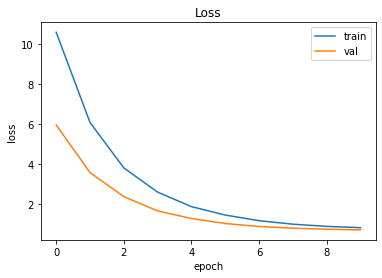

In [3]:
print(type(hist.history))
print(type(hist.history['loss']))
print(len(hist.history['loss']))

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

hist.history 는 dict 타입입니다. 'loss' 라는 키워드로 매 epoch 의 끝 마다 loss 함수의 값이 저장되어 epochs 개의 값이 있는 리스트를 불러올 수 있습니다. pyplot 으로 epoch 이 증가함에 따라 loss 값이 어떻게 감소하는지 확인할 수 있습니다. loss 는 학습데이터로 계산한 값이고 val_loss 는 validation 데이터로 계산한 값입니다.

In [4]:
x_val = np.random.rand(100,1)
y_val = x_val * 2 + 1

hist = model.fit( x_train, y_train, batch_size=32, epochs=10,
                 validation_data=(x_val, y_val) )

Train on 100 samples, validate on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 3ms/sample - loss: 0.7421 - val_loss: 0.6352
Epoch 2/10
100/100 [==============================] - 0s 239us/sample - loss: 0.7011 - val_loss: 0.6031
Epoch 3/10
100/100 [==============================] - 0s 249us/sample - loss: 0.6696 - val_loss: 0.5717
Epoch 4/10
100/100 [==============================] - 0s 269us/sample - loss: 0.6410 - val_loss: 0.5508
Epoch 5/10
100/100 [==============================] - 0s 239us/sample - loss: 0.6138 - val_loss: 0.5264
Epoch 6/10
100/100 [==============================] - 0s 259us/sample - loss: 0.5895 - val_loss: 0.5033
Epoch 7/10
100/100 [==============================] - 0s 229us/sample - loss: 0.5629 - val_loss: 0.4769
Epoch 8/10
100/100 [==============================] - 0s 259us/sample - loss: 0.5390 - val_loss: 0.4627
Epoch 9/10
100/100 [==============================] - 0s 259us/sample - loss: 0.5231 - val_loss: 0.4426
Epoch 10/10
100/100 

위와 같이 validation_split 대신에 validation_data 에 사용할 x, y 데이터를 쌍으로 넣어줄 수도 있습니다.